!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info missingno==0.5.2 pyreadr==0.4.7 upsetplot==0.8.0

In [1]:
!pip install --upgrade pip
!pip install palmerpenguins==0.1.4 numpy==1.23.4 pandas==1.5.1 seaborn matplotlib==3.6.0 empiricaldist==0.6.7 statsmodels==0.13.5 scikit-learn==1.1.2 pyjanitor==0.23.1 session-info missingno==0.5.2 pyreadr==0.4.7 upsetplot==0.8.0

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import scipy.stats
from sklearn.neighbors import KernelDensity
import missingno
import pyreadr
import upsetplot

In [3]:
%matplotlib inline
sns.set_style(rc={'axes.facecolor':'#dddede'}, style = 'darkgrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (9, 6)


continent_color = {
    'America': '#97DB4F',
    'Europe': '#0f7175ff',
    'Asia' :'#c65dc9ff',
    'Oceania':'#F9704E',
    'Africa': '#53d8fb'
}

In [4]:
df_health = pd.read_csv('data/health.csv')

In [5]:
%run pandas-missing-extension.ipynb

In [6]:
africa = ['South Africa', 'Kenya', 'Tunisia', 'Algeria', 'Nigeria', 'Egypt', 'Morocco']
america = ['Mexico', 'Canada', 'Ecuador', 'Argentina', 'United States', 'Uruguay', 'Colombia', 'Guatemala', 'Chile', 'Costa Rica', 'Panama', 'Brazil', 'Puerto Rico', 'Peru', 'Dominican Republic', 'Trinidad And Tobago', 'Venezuela']
asia = ['Taiwan (China)', 'South Korea', 'Japan', 'Thailand', 'Qatar', 'Israel', 'Sri Lanka', 'Turkey', 'Singapore', 'Malaysia', 'United Arab Emirates', 'Philippines', 'China', 'Hong Kong (China)', 'India', 'Jordan', 'Lebanon', 'Saudi Arabia', 'Indonesia', 'Kazakhstan', 'Kuwait', 'Pakistan', 'Vietnam', 'Oman', 'Nepal', 'Georgia', 'Cyprus', 'Iran', 'Azerbaijan', 'Iraq', 'Bangladesh']
europe = ['France', 'Denmark', 'Spain', 'Austria', 'Netherlands', 'Finland', 'Norway', 'Czech Republic', 'Belgium', 'Luxembourg', 'Switzerland', 'United Kingdom', 'Estonia', 'Lithuania', 'Germany', 'Portugal', 'Sweden', 'Iceland', 'Italy', 'Slovenia', 'Croatia', 'Latvia', 'Slovakia', 'Russia', 'Poland', 'Greece', 'Bulgaria', 'Romania', 'North Macedonia', 'Ukraine', 'Bosnia And Herzegovina', 'Hungary', 'Serbia', 'Ireland', 'Albania', 'Belarus', 'Malta']
oceania = ['Australia','New Zealand']

afric_dict = dict.fromkeys(africa, 'Africa')
americ_dict = dict.fromkeys(america, 'America')
asia_dict = dict.fromkeys(asia, 'Asia')
europe_dict = dict.fromkeys(europe, 'Europe')
oceania_dict = dict.fromkeys(oceania, 'Oceania')

dictionary = afric_dict | americ_dict | asia_dict | europe_dict | oceania_dict

df_health['Continent'] = df_health['Country'].map(dictionary)
df_health

,Country,Health Care Index,Health Care,Continent
0,Taiwan (China),85.9,157.8,Asia
1,South Korea,83.0,152.0,Asia
2,Japan,80.3,146.4,Asia
3,France,79.4,145.3,Europe
4,Denmark,79.2,145.8,Europe
...,...,...,...,...
89,Morocco,45.8,78.2,Africa
90,Malta,45.4,77.3,Europe
91,Iraq,43.5,73.9,Asia
92,Bangladesh,42.3,72.3,Asia


In [10]:
df_health = (df_health.rename_columns({
    'Health Care Index': 'Health_Care',
    'Health Care': 'Health_Care_Exp'
    })
)
df_health.columns

Index(['Country', 'Health_Care', 'Health_Care_Exp', 'Continent'], dtype='object')

In [15]:
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          94 non-null     object 
 1   Health_Care      94 non-null     float64
 2   Health_Care_Exp  94 non-null     float64
 3   Continent        94 non-null     object 
dtypes: float64(2), object(2)
memory usage: 3.1+ KB


In [16]:
df_health.describe()

,Health_Care,Health_Care_Exp
count,94.000000,94.000000
mean,63.778723,114.788298
std,10.232206,20.191592
min,39.300000,68.600000
25%,56.550000,99.825000
50%,64.150000,116.650000
75%,71.800000,130.550000
max,85.900000,157.800000


## Trend Measures

### Mean

In [17]:
df_health.mean()

/tmp/ipykernel_4588/4090991658.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_health.mean()


Health_Care         63.778723
Health_Care_Exp    114.788298
dtype: float64

In [21]:
df_health.median()

/tmp/ipykernel_4588/3924810734.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_health.median()


Health_Care         64.15
Health_Care_Exp    116.65
dtype: float64

In [20]:
df_health.mode(axis = 1, numeric_only= True, dropna= True)

,0,1
0,85.9,157.8
1,83.0,152.0
2,80.3,146.4
3,79.4,145.3
4,79.2,145.8
...,...,...
89,45.8,78.2
90,45.4,77.3
91,43.5,73.9
92,42.3,72.3


In [22]:
cols = df_health.select_dtypes(np.number).columns

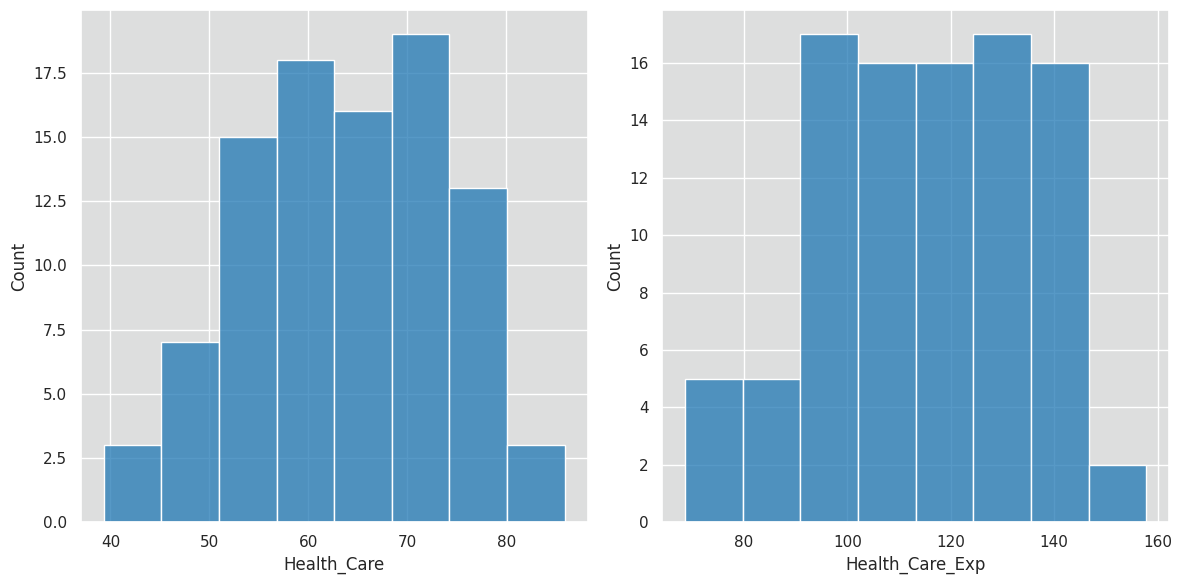

In [27]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

for i, i_col in enumerate(cols):
    sns.histplot(
        ax = ax[i],
        data = df_health,
        x = i_col
    )

plt.tight_layout()

<AxesSubplot: xlabel='Health_Care', ylabel='Health_Care_Exp'>

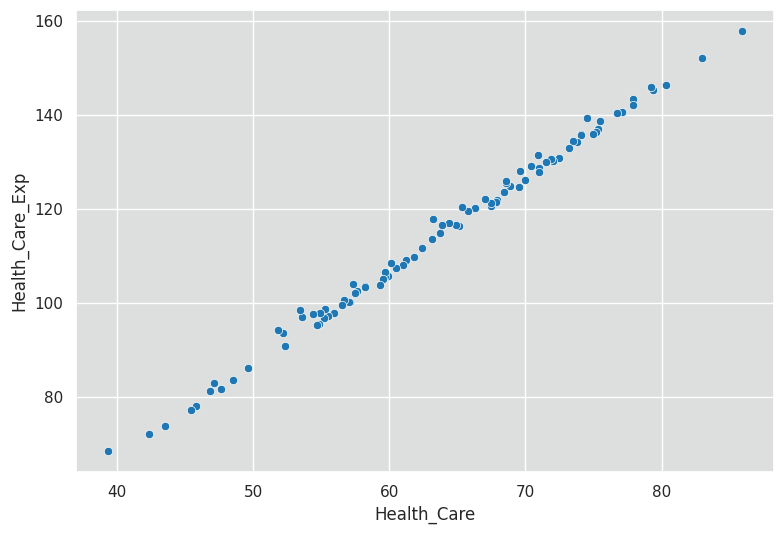

In [28]:
sns.scatterplot(
    data = df_health,
    x = 'Health_Care',
    y = 'Health_Care_Exp'
)

<AxesSubplot: xlabel='Health_Care', ylabel='Continent'>

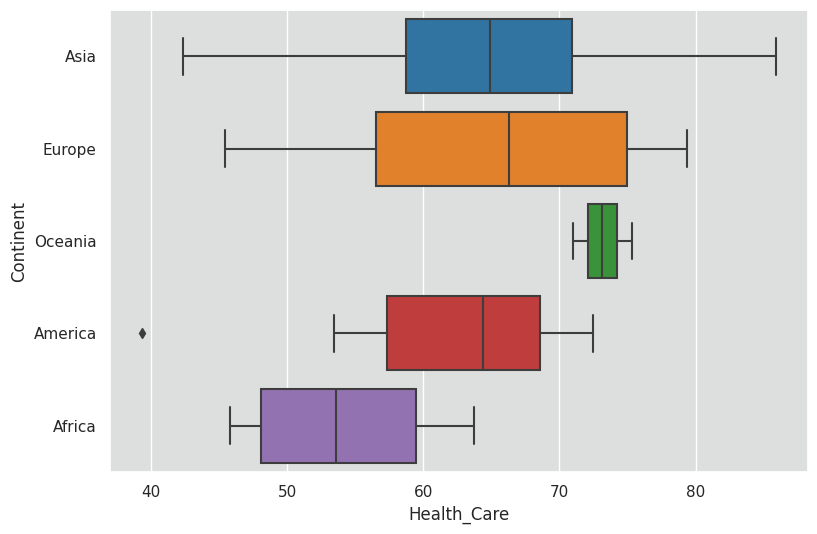

In [11]:
sns.boxplot(
    data = df_health,
    x = 'Health_Care',
    y = 'Continent'
)

In [14]:
import altair as alt

alt.Chart(df_health).mark_boxplot().encode(
    x = 'Health_Care',
    y = 'Continent',
    color = 'Continent',
    tooltip= ['Country', 'Health_Care']
).interactive().properties(
    width = 600,
    height = 400
)

/shared-libs/python3.9/py/lib/python3.9/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


alt.Chart(...)

In [37]:
sorted_health = df_health.sort_values('Health_Care',ascending=False)

most_health = sorted_health.head(10)
less_health = sorted_health.tail(10)

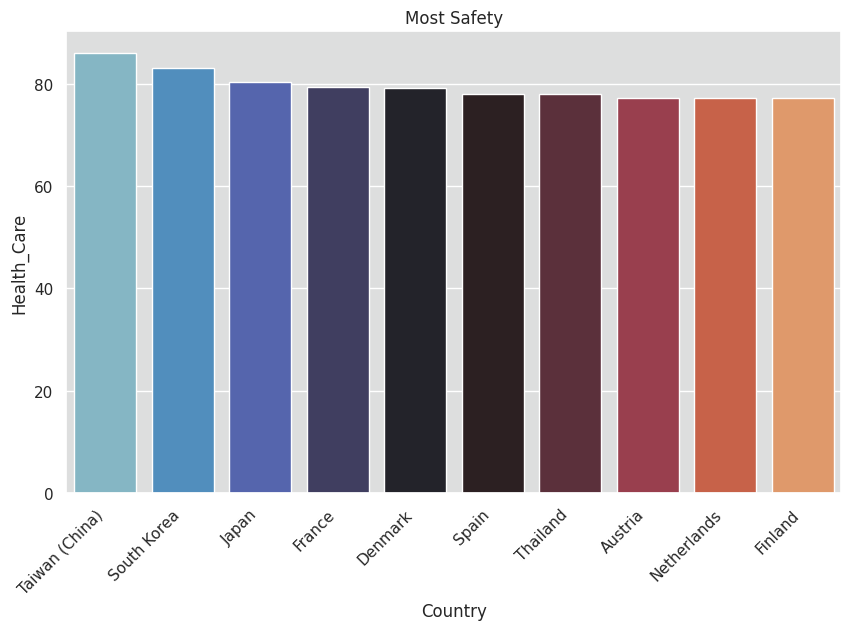

In [38]:
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(
    data=most_health,
    x="Country",
    y="Health_Care",
    palette= 'icefire',
    ax=ax
)


ax.set_title('Most Safety')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

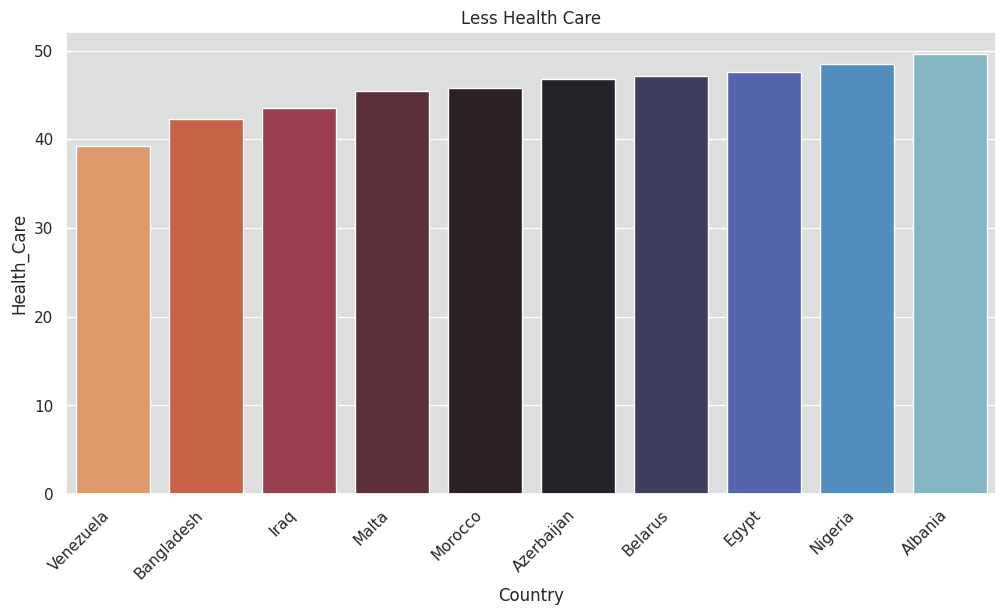

In [40]:
fig, ax = plt.subplots(figsize = (12,6))

sns.barplot(
    data = less_health,
    x = 'Country',
    y = 'Health_Care',
    palette= 'icefire_r',
    ax = ax,
    order = less_health.sort_values('Health_Care',ascending=True).Country
)



ax.set_title('Less Health Care')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.show()

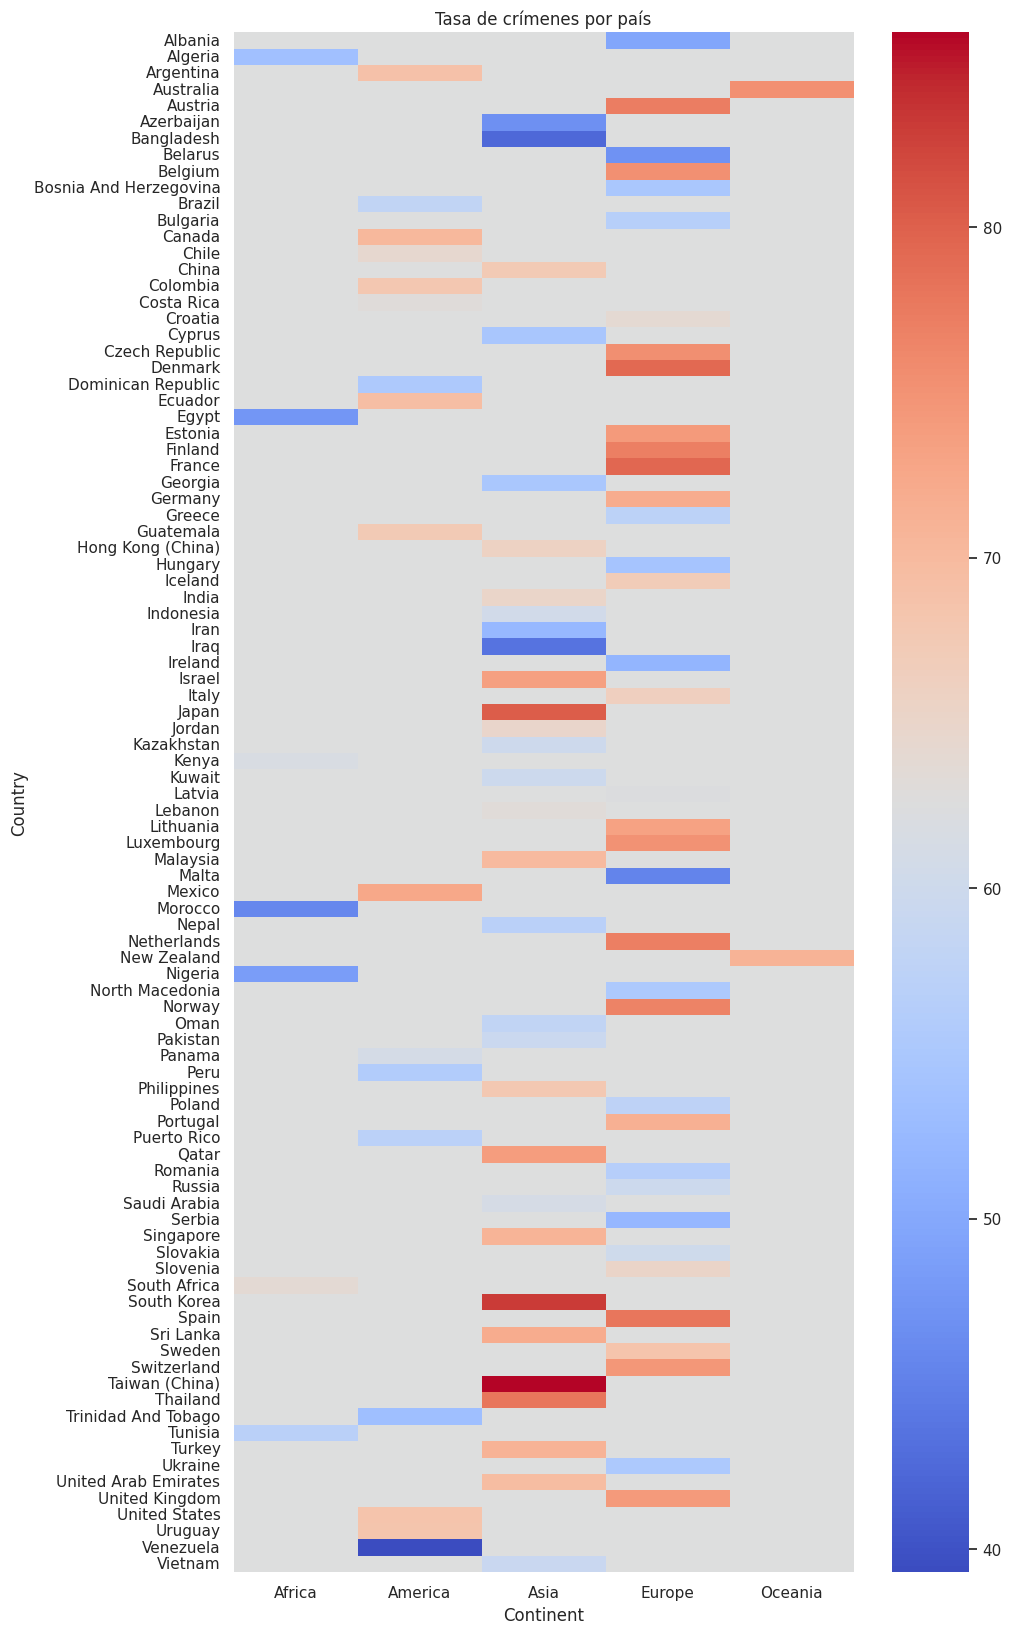

In [36]:
health_pivot = df_health.pivot(index="Country", columns="Continent", values="Health_Care")

plt.figure(figsize=(10, 20))
# crear el mapa de calor
sns.heatmap(health_pivot, cmap="coolwarm")

# añadir el título del gráfico
plt.title("Tasa de crímenes por país")

# mostrar el gráfico
plt.show()

In [31]:
df_america = df_health[df_health['Continent'] == 'America']
df_europe = df_health[df_health['Continent'] == 'Europe']
df_asia = df_health[df_health['Continent'] == 'Asia']
df_oceania = df_health[df_health['Continent'] == 'Oceania']
df_africa = df_health[df_health['Continent'] == 'Africa']

In [33]:
most_safety_america = df_america.sort_values('Health_Care', ascending= False).head(10)
most_safety_europe = df_europe.sort_values('Health_Care', ascending= False).head(10)
most_safety_asia = df_asia.sort_values('Health_Care', ascending= False).head(10)
most_safety_oceania = df_oceania.sort_values('Health_Care', ascending= False).head(10)
most_safety_africa = df_africa.sort_values('Health_Care', ascending= False).head(10)

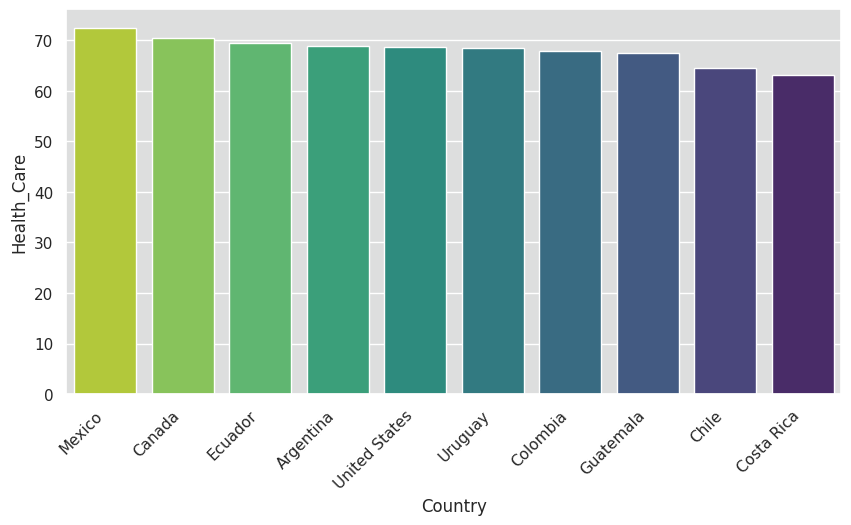

In [35]:

fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(
    data = most_safety_america,
    x = 'Country',
    y = 'Health_Care',
    palette= "viridis_r",
    ax = ax
)



ax.set_xticklabels(ax.get_xticklabels(), rotation=  45, horizontalalignment = 'right')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3aa0e2c3-1d5b-4b17-bb31-7a3c04c89158' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>